# Chaper 6 Stationary Gaussian Process

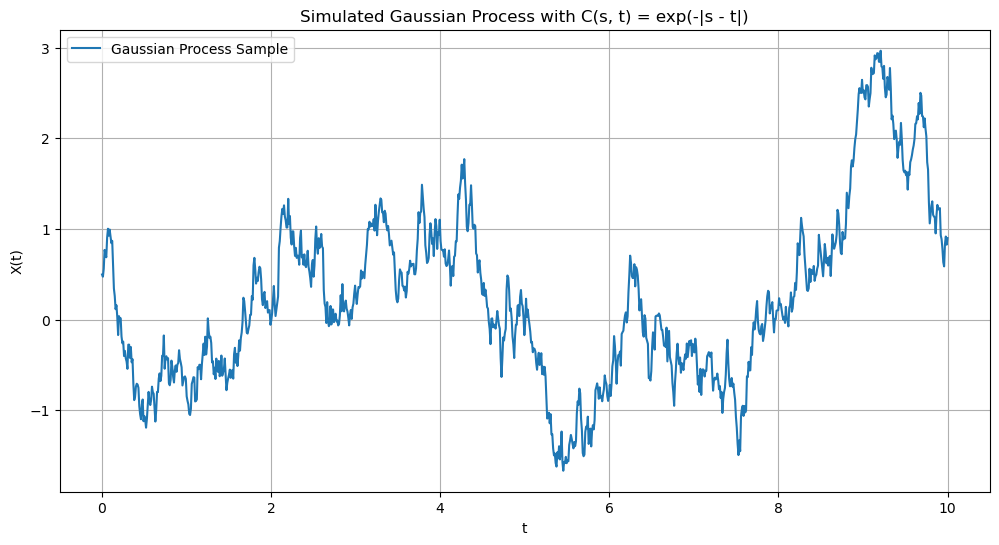

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以确保结果可重复
np.random.seed(42)

# 1. 选择时间点集合
t0 = 0
T = 10
n = 1000
t = np.linspace(t0, T, n)

# 2. 计算协方差矩阵
def covariance_function(s, t):
    return np.exp(-np.abs(s - t))

# 构建协方差矩阵 K
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = covariance_function(t[i], t[j])

# 添加抖动以提高数值稳定性
epsilon = 1e-10
K += epsilon * np.eye(n)

# 3. Cholesky 分解
try:
    L = np.linalg.cholesky(K)
except np.linalg.LinAlgError:
    print("协方差矩阵非正定，无法进行 Cholesky 分解。")
    exit()

# 生成标准正态随机向量 z
z = np.random.randn(n)

# 构建高斯过程样本 x
x = L @ z

# 4. 绘制结果
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='Gaussian Process Sample')
plt.title('Simulated Gaussian Process with C(s, t) = exp(-|s - t|)')
plt.xlabel('t')
plt.ylabel('X(t)')
plt.legend()
plt.grid(True)
plt.show()

